In [1]:
import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import h5py

## Save to drive

In [27]:
vidcap = cv2.VideoCapture('/Users/casper/Documents/Uni/Thesis/Data/EAED_1FBFA_0A.E3M02')
success,image = vidcap.read()
print(success)

True


In [28]:
count = 0
while success:
    image = image[:,540:,:] # Cropping
    cv2.imwrite("/Users/casper/Documents/Uni/Thesis/Data/EAED_1FBFA_0A_cropped/frame%d.jpg" % count, image)
    success,image = vidcap.read()
    count += 1

In [29]:
print(count)

3300


## Load imgs

In [27]:
vidcap = cv2.VideoCapture('../Data/Uncropped_videos/10204_2248C_01.E3M02')
success,image = vidcap.read()
print(success)

True


In [28]:
count = 0
imgs = []
while success:
    image = image[:,540:,:] # Cropping
    image = cv2.resize(image,(165,128)) # cv2 uses width/height format
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #image = image[:,:] / 255
    imgs.append(image)
    success,image = vidcap.read()
    count += 1
#imgs = np.expand_dims(np.moveaxis(np.array(imgs),[0,3,1,2],[0,1,2,3]),0)
imgs = np.array(imgs)
print(imgs.shape)
print(count)

(57, 128, 165, 3)
57


In [161]:
def with_opencv(filename):
    import cv2
    video = cv2.VideoCapture(filename)

    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
    duration = frame_count/fps

    return duration, frame_count, fps

In [165]:
print(with_opencv('../Data/Uncropped_videos/10632_201C0_0C.E3M02'))

(131.96, 3299.0, 25.0)


## Build dataset

In [2]:
data = np.genfromtxt('../Data/Thresholds.csv',delimiter=',',dtype=None)
data = data[data[:,-2] != '']
data = np.vstack((data[1:,0],data[1:,-2])).T

/Users/shared/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [3]:
def build_dataset(idx_list,skip,name):
    imgs = []
    labels = []
    for idx in idx_list:
        count = 0
        vidcap = cv2.VideoCapture(f'../Data/Uncropped_videos/{data[idx][0]}')
        success,image = vidcap.read()
        while success:
            if count % skip == 0:
                image = image[:,540:,:] # Cropping
                image = cv2.resize(image,(165,128)) # cv2 uses width/height format
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                # image = image[:,:] / 255
                imgs.append(image)
                label = 0 if count < np.int(data[idx][1]) else 1
                labels.append(label)
            success,image = vidcap.read()
            count += 1
    imgs = np.moveaxis(np.array(imgs),[0,3,1,2],[0,1,2,3])

    file = h5py.File(f'../Data/Folds/{name}.h5','w')
    file.create_dataset('data',data=imgs)
    file.close()

    np.savetxt(f'../Data/Folds/Labels_{name}.csv', labels, delimiter=",")

In [21]:
name = 'Fold_7_skip_20'
build_dataset(np.arange(31,36),20,name)

file = h5py.File(f'../Data/Folds/{name}.h5','r')
imgs = np.array(file.get('data'))
file.close()
print(imgs.shape)

labels = np.genfromtxt(f'../Data/Folds/Labels_{name}.csv',delimiter=',')
print(labels.shape)

(827, 3, 128, 165)
(827,)


### Build treatment CSV

In [132]:
data = np.genfromtxt('../Data/Treatments.csv',delimiter=',',dtype=None)
data = data[data[:,-1] != b'']
data = np.vstack((data[0:,1].astype('int'),data[0:,-6].astype('int'),data[0:,-5].astype('int'))).T

/Users/Shared/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [133]:
np.savetxt(f'../Data/Datasets/Treatments_All.csv', data, delimiter=",")

(30, 3)

In [66]:
a = np.array([[1,2,3],[4,5,6]])
a[:,-1] != 1

array([ True,  True])

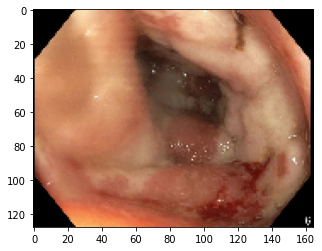

In [179]:
plt.imshow(np.moveaxis(imgs[30],[1,2,0],[0,1,2]))